In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import yfinance as yfin
import utils as erk 
import FactorModelLibForMOOC as fm 


%load_ext autoreload
%autoreload 2

c:\Users\Admin\PycharmProjects\Portfolio Analysis\edhec_risk_kit_206.py:43: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if filetype is "returns":
c:\Users\Admin\PycharmProjects\Portfolio Analysis\edhec_risk_kit_206.py:46: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "nfirms":
c:\Users\Admin\PycharmProjects\Portfolio Analysis\edhec_risk_kit_206.py:49: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif filetype is "size":


In [5]:
tickers = ['kweb', 't', 'igm', 'voo', 'intc', 'aapl', 'xom', 'wfc', 'iau', 'tem']


dataframe = yfin.download(tickers, period = 'max', threads=False)['Adj Close']
returns = dataframe.pct_change().dropna()
mreturns = returns.resample('ME').apply(erk.compound).to_period('ME')

mreturns 


[                       0%%                      ]Failed to get ticker 'TEM' reason: Expecting value: line 1 column 1 (char 0)
[*********************100%%**********************]  10 of 10 completed

10 Failed downloads:
['AAPL', 'T', 'IAU', 'WFC', 'KWEB', 'XOM', 'INTC', 'IGM', 'VOO']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')
['TEM']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


TypeError: unsupported Type MultiIndex

In [15]:
data = {
    "Ticker": [
        "APPLE INC. (XNAS:AAPL)",
        "I-80 GOLD CORP. (XTSE:IAU)",
        "IGM FINANCIAL INC. (XTSE:IGM)",
        "INTEL CORPORATION (XNAS:INTC)",
        "KraneShs:CSI China Intrt (ARCX:KWEB)",
        "AT&T INC. (XNYS:T)",
        "Vanguard 500 Idx;ETF (ARCX:VOO)",
        "WELLS FARGO & COMPANY (XNYS:WFC)",
        "EXXON MOBIL CORPORATION (XNYS:XOM)"
    ],
    "Weight": [
        0.187708,
        0.020307,
        0.120159,
        0.019037,
        0.049453,
        0.052010,
        0.230637,
        0.121392,
        0.198757
    ]
}

df = pd.DataFrame(data)


# Calculate ENH
# ENH = 1 / sum(w_i^2)
enh = 1 / (df["Weight"] ** 2).sum()

def weight_current(r):
    '''
    Returns weight of current porfolio
    '''
    df = pd.DataFrame(data)

    return np.array(df['Weight'])

In [16]:
weight_current(mreturns)

array([0.187708, 0.020307, 0.120159, 0.019037, 0.049453, 0.05201 ,
       0.230637, 0.121392, 0.198757])

In [21]:


print(f"Effective Number of Holdings (ENH): {enh:.2f}")
ewr = erk.backtest_ws(mreturns, estimation_window=60, weighting=erk.weight_ew)
cwr = erk.backtest_ws(returns, estimation_window=60, weighting=erk.weight_cw, cap_weights=ind_mcap)
mv_sr = erk.backtest_ws(mreturns, estimation_window = 60, weighting= erk.weight_gmv, cov= erk.sample_cov)
mv_cc_r = erk.backtest_ws(mreturns, estimation_window=60, weighting=erk.weight_gmv, cov_estimator=erk.cc_cov)
mv_sh_r = erk.backtest_ws(mreturns, estimation_window=60, weighting=erk.weight_gmv, cov_estimator=erk.shrinkage_cov, delta=0.5)
msr = erk.msr_window_annrets(mreturns, estimation_window=60)
current = erk.backtest_ws(mreturns, estimation_window=60, weighting=weight_current)

Effective Number of Holdings (ENH): 6.13


NameError: name 'ind_mcap' is not defined

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.107220,0.171866,-0.335322,2.988604,0.075944,0.101909,0.437101,-0.203808
GMV-Sample,0.102670,0.127295,-0.009514,2.924682,0.051369,0.065294,0.555494,-0.209885
GMV-CC,0.122747,0.132027,-0.269925,3.033137,0.054705,0.071370,0.683597,-0.166167
GMV-Shrink 0.5,0.114223,0.126319,-0.084221,2.850132,0.050860,0.063482,0.648818,-0.184778
MSR,0.128982,0.215619,-0.010870,2.844239,0.090049,0.108124,0.446554,-0.301921
Current,0.152517,0.192389,-0.467074,3.507029,0.083866,0.116779,0.619610,-0.255642


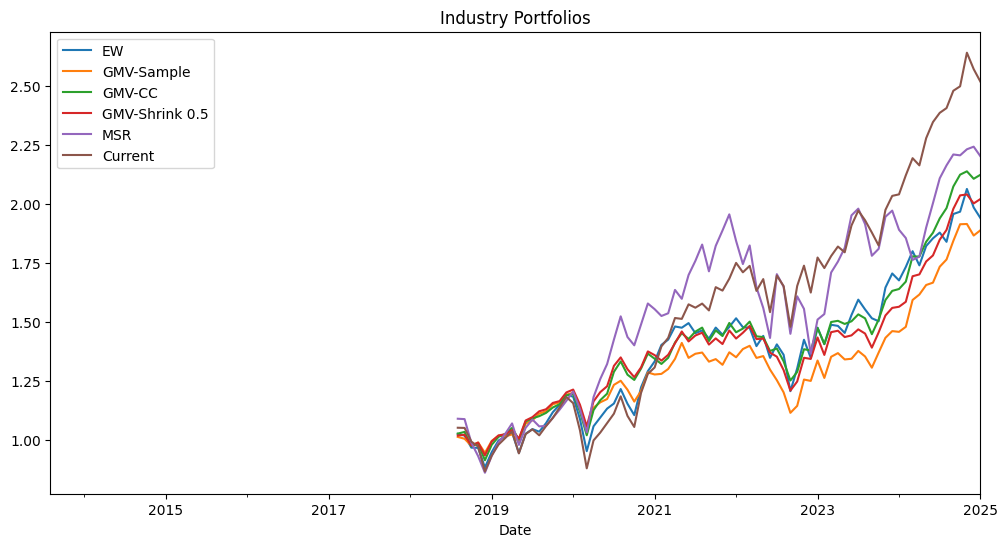

In [20]:
btr = pd.DataFrame({"EW": ewr, "GMV-Sample": mv_sr, "GMV-CC": mv_cc_r, 'GMV-Shrink 0.5': mv_sh_r, "MSR" : msr[0], "Current": current})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios")
erk.summary_stats(btr.dropna())

In [6]:
print(df)

                                 Ticker    Weight
0                APPLE INC. (XNAS:AAPL)  0.187708
1            I-80 GOLD CORP. (XTSE:IAU)  0.020307
2         IGM FINANCIAL INC. (XTSE:IGM)  0.120159
3         INTEL CORPORATION (XNAS:INTC)  0.019037
4  KraneShs:CSI China Intrt (ARCX:KWEB)  0.049453
5                    AT&T INC. (XNYS:T)  0.052010
6       Vanguard 500 Idx;ETF (ARCX:VOO)  0.230637
7      WELLS FARGO & COMPANY (XNYS:WFC)  0.121392
8    EXXON MOBIL CORPORATION (XNYS:XOM)  0.198757


In [10]:
mreturns

Ticker,AAPL,IAU,IGM,INTC,KWEB,T,VOO,WFC,XOM
Date,,,,,,,,,
2013-08,0.073918,0.062844,-0.023288,-0.043316,0.016362,-0.052911,-0.042471,-0.065480,-0.053570
2013-09,-0.021489,-0.047302,0.041974,0.042766,0.142269,-0.000295,0.033897,0.005842,-0.012850
2013-10,0.096382,-0.003103,0.040606,0.067626,-0.015733,0.089464,0.044675,0.033156,0.041608
2013-11,0.070053,-0.056031,0.036614,-0.016625,0.041958,-0.027348,0.029961,0.038463,0.050168
2013-12,0.008902,-0.037098,0.043196,0.088926,0.069568,-0.001420,0.026374,0.031349,0.082585
...,...,...,...,...,...,...,...,...,...
2024-09,0.017467,0.051184,0.031202,0.064428,0.324251,0.105528,0.021763,-0.033863,-0.006105
2024-10,-0.030429,0.043058,-0.003961,-0.082694,-0.053498,0.037700,-0.009476,0.149230,-0.003754
2024-11,0.051707,-0.030671,0.060381,0.117565,-0.043478,0.027507,0.058890,0.180051,0.018405


In [13]:
np.array(df["Weight"])

array([0.187708, 0.020307, 0.120159, 0.019037, 0.049453, 0.05201 ,
       0.230637, 0.121392, 0.198757])